In [1]:
import Basic_Risk_Assessment_Tools as brat

In [2]:
import pandas as pd
import numpy as np
from nsepy import get_history
import datetime
import matplotlib
%matplotlib inline
import copy

In [3]:
from scipy import stats
from scipy.optimize import minimize
%load_ext autoreload
%autoreload 2

In [5]:
start_date = datetime.date(2009,1,1)
end_date = datetime.date.today()
nse_tickers = ["AVANTIFEED","BAJAJFINSV","BAJAJHLDNG","BAJFINANCE","BATAINDIA","BERGEPAINT","BRITANNIA","EICHERMOT","HDFCBANK"]
#["HINDUNILVR","ICICIBANK","JUBLFOOD","M&M","MOTHERSUMI","NCC","OLECTRA","RELIANCE","PIDILITIND","SBICARD","SBIN","SOLARINDS","TATACONSUM","TRENT","WESTLIFE"]
closing_prices, returns = brat.get_returns_from_close_as_dataframe(nse_tickers,start_date,end_date)

AVANTIFEED
done :)
BAJAJFINSV
done :)
BAJAJHLDNG
done :)
BAJFINANCE
done :)
BATAINDIA
done :)
BERGEPAINT
done :)
BRITANNIA
done :)
EICHERMOT
done :)
HDFCBANK
done :)


In [21]:
var_df = brat.get_semideviation_var_cvar(returns, 5)
var_df.sort_values(by=['Historical VaR'])

,Semi-Deviation,Gaussian VaR,Cornish-Fisher VaR,Conditional VaR,Historical VaR
HDFCBANK,0.027208,0.038352,-0.229581,0.041971,0.021486
HINDUNILVR,0.009448,0.025256,0.016390,0.031320,0.022953
BRITANNIA,0.026308,0.038902,-0.167120,0.041977,0.022962
PIDILITIND,0.017663,0.032024,-0.015230,0.038112,0.023920
SOLARINDS,0.024896,0.039856,-0.137146,0.046254,0.025463
BAJAJHLDNG,0.014041,0.031291,0.025141,0.042701,0.026154
TRENT,0.025964,0.043968,-0.167028,0.044863,0.026670
RELIANCE,0.022485,0.038469,-0.010689,0.047227,0.027281
BATAINDIA,0.018513,0.037419,0.018076,0.046349,0.029738
TATACONSUM,0.027331,0.043806,-0.178898,0.050459,0.029865


In [6]:
# remove AvantiFeed, SBICard and Westlife from returns
new_dict = copy.deepcopy(returns)
for key in returns.keys():
    if key=="AVANTIFEED" or key=="SBICARD" or key=="WESTLIFE":
        del new_dict[key]
similar_length_returns = new_dict.copy()
similar_length_returns.keys()

dict_keys(['BAJAJFINSV', 'BAJAJHLDNG', 'BAJFINANCE', 'BATAINDIA', 'BERGEPAINT', 'BRITANNIA', 'EICHERMOT', 'HDFCBANK'])

In [7]:
def get_portfolio_return(weights, annualized_returns):
    '''
    INPUT: weights and the cobined dataframe of returns of all companies.
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    
    OUTPUT: weighted return of the portfolio
    '''
    return weights.T @ annualized_returns

In [8]:
def get_portfolio_vol(weights, cov_matrix):
    """
    INPUT: weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    
    OUTPUT: the volatility of the portfolio.
    
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    """
    return (weights.T @ cov_matrix @ weights)**0.5

In [13]:
stats = brat.get_AnnVol_AnnRet_Ret2Risk_Sharpe(returns_2)
ann_return = stats['Annualized Returns']

combined_returns_df, cov_matrix = brat.get_covariance_matrix(returns_2)

number_of_assets = len(["BAJAJFINSV","BAJAJHLDNG","BAJFINANCE","BATAINDIA","BERGEPAINT","BRITANNIA","EICHERMOT","HDFCBANK","HINDUNILVR","ICICIBANK","JUBLFOOD","M&M","MOTHERSUMI","NCC","OLECTRA","RELIANCE","PIDILITIND","SBIN","SOLARINDS","TATACONSUM","TRENT"])
weights = np.repeat(1/number_of_assets, number_of_assets)

brat.get_portfolio_return(weights, ann_return)

0.1367554409963145

In [14]:
brat.get_portfolio_vol(weights, cov_matrix)

0.011858385213567553

# 2 Asset Frontier

In [9]:
start_date = datetime.date(2009,1,1)
end_date = datetime.date.today()
nse_tickers = ["BAJAJHLDNG","JUBLFOOD"]
closing_prices, returns_2 = brat.get_returns_from_close_as_dataframe(nse_tickers, start_date, end_date)

BAJAJHLDNG
done :)
JUBLFOOD
done :)


In [10]:
frontier = brat.get_efficient_frontier_2assets(returns_2, 50)

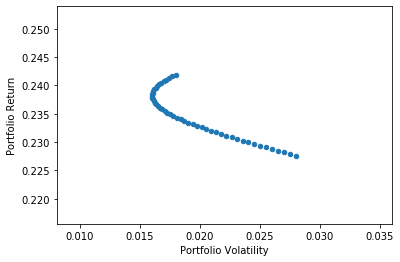

In [11]:
frontier_plot = frontier.plot.scatter(x='Portfolio Volatility', y='Portfolio Return')

# Efficient Frontier for N Assets

In [9]:
def minimize_vol(returns, target_return):
    """
    INPUT: returns of assets in portfolio and target return for the portfolio
    
    OUTPUT: The frontier weights for a portfolio consisting of
    the input assets
    """
    n_assets = len(list(returns.keys()))
    init_guess = np.repeat(1/n_assets, n_assets)
    bound = ((0.0,1.0),)*n_assets
    
    ann_returns = brat.get_AnnVol_AnnRet_Ret2Risk_Sharpe(returns)['Annualized Returns']
    combined_returns_df, cov_matrix = brat.get_covariance_matrix(returns)
    
    return_is_target = {
        'type': 'eq',
        'args': (ann_returns,),
        'fun': lambda weights, ann_returns: target_return - brat.get_portfolio_return(weights, ann_returns)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    
    results = minimize(brat.get_portfolio_vol, init_guess,
                      args=(cov_matrix,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bound)
    
    return results.x

In [13]:
w = brat.minimize_vol(returns_2, 0.227)
combined_returns_df, cov_matrix_2 = brat.get_covariance_matrix(returns_2)
brat.get_portfolio_vol(w, cov_matrix_2)

0.02805681689952815

In [10]:
def get_frontier_weights(returns, num_target_points=50):
    """
    INPUT: returns of assets to be used in portfolio and number of
    points for which you need the weights
    
    OUTPUT: gives a list of returns between the min and max 
    annualised returns among the assets that are to be included
    in the portfolio
    """
    ann_returns = brat.get_AnnVol_AnnRet_Ret2Risk_Sharpe(returns)['Annualized Returns']
    frontier_target_returns = np.linspace(ann_returns.min(), ann_returns.max(), num_target_points)
    frontier_target_weights = [minimize_vol(returns, target_return) for target_return in frontier_target_returns]
    return frontier_target_weights

In [11]:
def plot_efficient_frontier(returns, num_of_front_pts=50,plot_ewp=False, plot_gmv=False):
    """
    Plots the multi-asset efficient frontier
    
    INPUT: returns of assets in portfolio and number of points on
    the frontier that you wish to plot
    
    OUTPUT: risk vs return plot 
    """
    optimal_weights = get_frontier_weights(returns, num_of_front_pts)
    ann_returns = brat.get_AnnVol_AnnRet_Ret2Risk_Sharpe(returns)['Annualized Returns']
    combined_returns_df, cov_matrix = brat.get_covariance_matrix(returns)
    rets = [brat.get_portfolio_return(w, ann_returns) for w in optimal_weights]
    vols = [brat.get_portfolio_vol(w, cov_matrix) for w in optimal_weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style='.-')

In [21]:
optimal_weights = get_frontier_weights(similar_length_returns, 50)

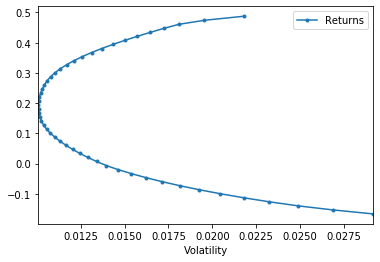

In [22]:
plot_efficient_frontier(similar_length_returns, 50)

In [59]:
def plot_efficient_frontier(returns, num_of_front_pts=50, plot_cml=True, risk_free_rate=0.0581):
    """
    Plots the multi-asset efficient frontier
    
    INPUT: returns of assets in portfolio and number of points on
    the frontier that you wish to plot
    
    OUTPUT: risk vs return plot 
    """
    optimal_weights = get_frontier_weights(returns, num_of_front_pts)
    annualized_return = brat.get_AnnVol_AnnRet_Ret2Risk_Sharpe(returns)['Annualized Returns']
    combined_returns_df, cov_matrix = brat.get_covariance_matrix(returns)
    rets = [get_portfolio_return(w, annualized_return) for w in optimal_weights]
    vols = [get_portfolio_vol(w, cov_matrix) for w in optimal_weights]
    
    msr_weights = maximize_sharpe_ratio(returns)
    msr_return = get_portfolio_return(msr_weights, brat.get_AnnVol_AnnRet_Ret2Risk_Sharpe(returns)['Annualized Returns'])
    msr_vol = get_portfolio_vol(msr_weights, cov_matrix)
    
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    
    axes = ef.plot.line(x="Volatility", y="Returns", style='.-')
    axes.set_xlim(left=0)
    
    if plot_cml:
        cml_x = [0, msr_vol]
        cml_y = [risk_free_rate, msr_return]
        axes.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")
        
    return axes

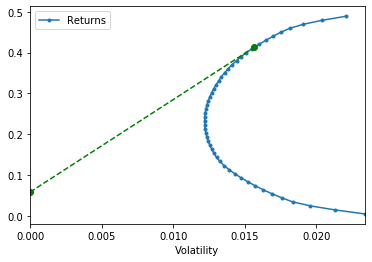

In [60]:
plot_efficient_frontier(similar_length_returns, 50)

# Maximum Sharpe Ratio Portfolio

In [61]:
def maximize_sharpe_ratio(returns, risk_free_rate=0.0581):
    """
    INPUT: returns of assets in portfolio and risk free rate of return
    
    OUTPUT: The frontier weights for a portfolio consisting of
    the input assets
    """
    n_assets = len(list(returns.keys()))
    init_guess = np.repeat(1/n_assets, n_assets)
    bound = ((0.0,1.0),)*n_assets
    
    annualized_returns = brat.get_AnnVol_AnnRet_Ret2Risk_Sharpe(returns)['Annualized Returns']
    combined_returns_df, cov_matrix = brat.get_covariance_matrix(returns)
    
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, risk_free_rate, annualized_returns, cov_matrix):
        """
        Return the negative of the Sharpe Ratio
        """
        port_return = get_portfolio_return(weights, annualized_returns)
        port_vol = get_portfolio_vol(weights, cov_matrix)
        neg_sharpe_ratio = -((port_return-risk_free_rate)/port_vol)
        return neg_sharpe_ratio
    
    results = minimize(neg_sharpe_ratio, init_guess,
                       args=(risk_free_rate, annualized_returns, cov_matrix,), 
                       method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1),
                       bounds=bound)
    
    return results.x

In [62]:
def plot_efficient_frontier(returns, num_of_front_pts=50, plot_cml=True, plot_ewp=True, risk_free_rate=0.0581):
    """
    Plots the multi-asset efficient frontier
    
    INPUT: returns of assets in portfolio and number of points on
    the frontier that you wish to plot
    
    OUTPUT: risk vs return plot 
    """
    optimal_weights = get_frontier_weights(returns, num_of_front_pts)
    annualized_return = brat.get_AnnVol_AnnRet_Ret2Risk_Sharpe(returns)['Annualized Returns']
    combined_returns_df, cov_matrix = brat.get_covariance_matrix(returns)
    rets = [get_portfolio_return(w, annualized_return) for w in optimal_weights]
    vols = [get_portfolio_vol(w, cov_matrix) for w in optimal_weights]
    
    msr_weights = maximize_sharpe_ratio(returns)
    msr_return = get_portfolio_return(msr_weights, brat.get_AnnVol_AnnRet_Ret2Risk_Sharpe(returns)['Annualized Returns'])
    msr_vol = get_portfolio_vol(msr_weights, cov_matrix)
    
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    
    axes = ef.plot.line(x="Volatility", y="Returns", style='.-')
    axes.set_xlim(left=0)
    
    if plot_cml:
        cml_x = [0, msr_vol]
        cml_y = [risk_free_rate, msr_return]
        axes.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")
        
    if plot_ewp:
        equal_wt_port_weights = np.repeat(1/annualized_return.shape[0], annualized_return.shape[0])
        equal_wt_return = get_portfolio_return(equal_wt_port_weights, annualized_return)
        equal_wt_vol = get_portfolio_vol(equal_wt_port_weights, cov_matrix)
        axes.plot([equal_wt_vol], [equal_wt_return], color="goldenrod", marker="o", markersize=7)
        
    return axes

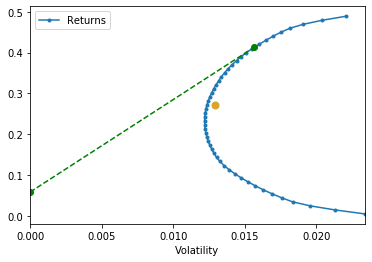

In [63]:
plot_efficient_frontier(similar_length_returns, 50)

# Global Minimum Variance Portfolio

In [51]:
def global_minimum_vol(returns, risk_free_rate=0):
    """
    INPUT: returns of assets in portfolio
    
    OUTPUT: Weights of Global Minimum Volatility Portfolio
    """
    n_assets = len(list(returns.keys()))
    init_guess = np.repeat(1/n_assets, n_assets)
    bound = ((0.0,1.0),)*n_assets
    
    annualized_returns = pd.Series([1]*n_assets, index =list(returns.keys())) 
    combined_returns_df, cov_matrix = brat.get_covariance_matrix(returns)
    
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, risk_free_rate, annualized_returns, cov_matrix):
        """
        Return the negative of the Sharpe Ratio
        """
        port_return = get_portfolio_return(weights, annualized_returns)
        port_vol = get_portfolio_vol(weights, cov_matrix)
        neg_sharpe_ratio = -((port_return-risk_free_rate)/port_vol)
        return neg_sharpe_ratio
    
    results = minimize(neg_sharpe_ratio, init_guess,
                       args=(risk_free_rate, annualized_returns, cov_matrix,), 
                       method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1),
                       bounds=bound)
    
    return results.x

In [66]:
def plot_efficient_frontier(returns, num_of_front_pts=50, plot_cml=True, plot_ewp=True, plot_gmv=True, risk_free_rate=0.0581):
    """
    Plots the multi-asset efficient frontier
    
    INPUT: returns of assets in portfolio and number of points on
    the frontier that you wish to plot
    
    OUTPUT: risk vs return plot 
    """
    optimal_weights = get_frontier_weights(returns, num_of_front_pts)
    annualized_return = brat.get_AnnVol_AnnRet_Ret2Risk_Sharpe(returns)['Annualized Returns']
    combined_returns_df, cov_matrix = brat.get_covariance_matrix(returns)
    rets = [get_portfolio_return(w, annualized_return) for w in optimal_weights]
    vols = [get_portfolio_vol(w, cov_matrix) for w in optimal_weights]
    
    msr_weights = maximize_sharpe_ratio(returns)
    msr_return = get_portfolio_return(msr_weights, brat.get_AnnVol_AnnRet_Ret2Risk_Sharpe(returns)['Annualized Returns'])
    msr_vol = get_portfolio_vol(msr_weights, cov_matrix)
    
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    
    axes = ef.plot.line(x="Volatility", y="Returns", style='.-')
    axes.set_xlim(left=0)
    
    if plot_cml:
        cml_x = [0, msr_vol]
        cml_y = [risk_free_rate, msr_return]
        axes.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")
        
    if plot_ewp:
        equal_wt_port_weights = np.repeat(1/annualized_return.shape[0], annualized_return.shape[0])
        equal_wt_return = get_portfolio_return(equal_wt_port_weights, annualized_return)
        equal_wt_vol = get_portfolio_vol(equal_wt_port_weights, cov_matrix)
        axes.plot([equal_wt_vol], [equal_wt_return], color="goldenrod", marker="o", markersize=7)
    
    if plot_gmv:
        gmv_weights = global_minimum_vol(returns)
        gmv_return = get_portfolio_return(gmv_weights, annualized_return)
        gmv_vol = get_portfolio_vol(gmv_weights, cov_matrix)
        axes.plot([gmv_vol], [gmv_return], color="midnightblue", marker="o", markersize=7)
    
    return axes

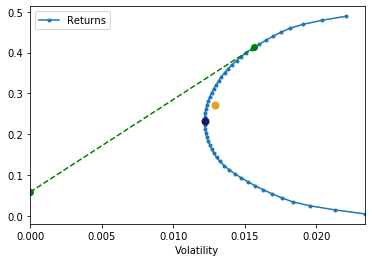

In [67]:
plot_efficient_frontier(similar_length_returns, 50)

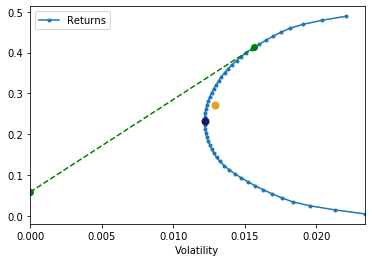

In [68]:
brat.plot_efficient_frontier(similar_length_returns, 50)